# B-V Algorithm 을 이용한 Code Cracker

#### Qubit의 특성을 이용해 n자리의 이진수 암호를 풀 수 있다.

In [2]:
from qiskit import *

In [3]:
%matplotlib inline

In [4]:
from qiskit.tools.visualization import plot_histogram

In [10]:
from random import *
n=input("이진수의 자릿수를 입력하세요: ")
n=int(n)
random=randint(2**(n-1),2**n-1)
random=format(random, "b")
secretnumber=str(random)
print(secretnumber)

이진수의 자릿수를 입력하세요: 13
1000000110001


In [11]:
digits=len(secretnumber)
circuit = QuantumCircuit(digits+1,digits)
circuit.h(range(digits))
circuit.x(digits) #X on the last qubit 
circuit.h(digits) #Hadamard on the last qubit 

circuit.barrier() #Make a barrier


for ii, yesno in enumerate(reversed(secretnumber)):
    if yesno == '1':
        circuit.cx(ii,digits)




circuit.barrier()
circuit.h(range(digits))
circuit.barrier()
circuit.measure(range(digits),range(digits))

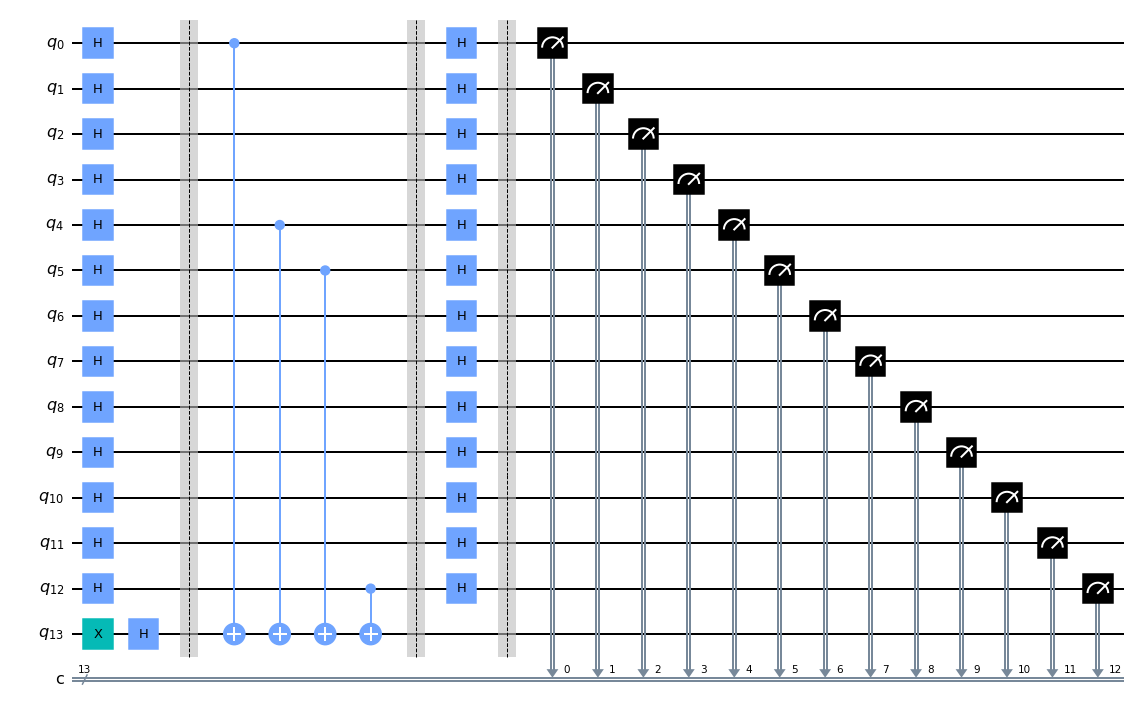

In [12]:
circuit.draw(output="mpl")

In [13]:
simulator = Aer.get_backend('qasm_simulator')
result = execute(circuit, backend = simulator, shots = 1).result()
counts = result.get_counts()
print(counts)

{'1000000110001': 1}
